In [3]:
cd /Users/angli/Documents/GitHub/ToxicCommentsClassification

/Users/angli/Documents/GitHub/ToxicCommentsClassification


In [4]:
ls

All_Wordcloud.py*
CleanCommentGenerator.py
Comment2VecPlot.py
CommentsFeaturesGenerator.py
DataExplorationPrediction_Features.ipynb
DataExplorationPrediction_w2v.ipynb
README.md
ToxicCommentAnalysis.ipynb
Word2Vec_merge.py
Word2Vec_plot.py
cabin-sketch-v1.02/
report_update.docx*
usingW2V.py
w2v_train.py
word_cloud_pngs/
wordcloud.pyc*
x_tsne.csv
x_tsne.png


In [5]:
import sklearn
print (sklearn.__version__)

0.19.1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

In [7]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1.3)

In [14]:
train = pd.read_csv("/Users/angli/Ang/OneDrive/Documents/Pitt_PhD/Class/2018Spring/ML/finalProject/data/train_features.csv")

In [16]:
train = train.set_index('id')

In [75]:
train.columns.values[0:17]

array(['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score'], dtype=object)

In [17]:
train.columns.values[17:24]

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

In [18]:
train.shape

(159571, 23)

In [19]:
train.head(3)

,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_we,num_words,num_unique_words,...,num_URL,num_positive,num_negtive,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,,,,,,,,,,,,,,,
0000997932d777bf,264,17,0.064394,0,1,6,0,2,42,41,...,0,1,8,0.036475,0,0,0,0,0,0
000103f0d9cfb60f,112,8,0.071428,1,0,5,0,0,18,17,...,0,1,1,0.000000,0,0,0,0,0,0
000113f07ec002fd,233,4,0.017167,0,0,4,0,0,42,39,...,0,0,3,0.030142,0,0,0,0,0,0


### feature exploration

In [20]:
#make the label as binary classification
rowsums=train.iloc[:,17:24].sum(axis=1)
#sum(list(rowsums>0))
train['dirty']=(rowsums>0)
train['dirty'].sum()

16225

In [21]:
train['clean']=(rowsums==0)
train['clean'].sum()

143346

In [22]:
#count each severity 
print('Total rows in train is {}'.format(len(train)))
print(train.iloc[:,17:25].sum())

Total rows in train is 159571
toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
dirty             16225.0
clean            143346.0
dtype: float64


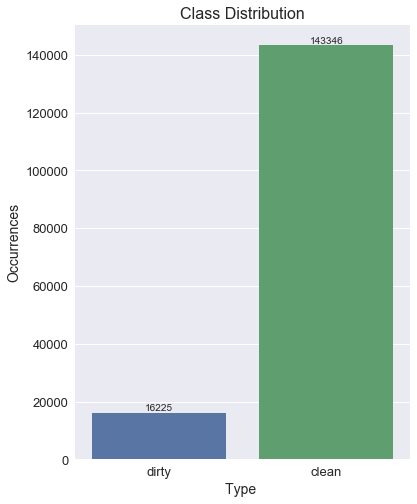

In [34]:
x=train.iloc[:,23:25].sum()

plt.figure(figsize=(6,8))
ax= sns.barplot(x.index, x.values) #,palette=palette
plt.title("Class Distribution", fontsize=16)
plt.ylabel('Occurrences', fontsize=14)
plt.xlabel('Type ', fontsize=14)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

In [26]:
print("percentage of labeled data is: ", (159571 - 143346)/159571)

percentage of labeled data is:  0.10167887648758234


Text(0,0.5,'Occurrences')

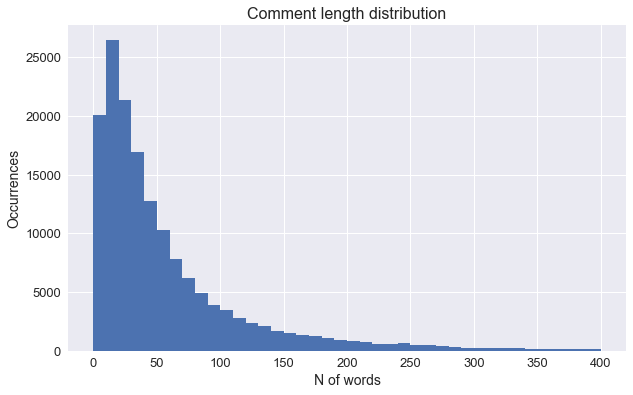

In [36]:
plt.figure(figsize=(10,6))
plt.hist(list(train["num_words"]),bins = np.arange(0,410,10))
plt.title("Comment length distribution", fontsize=16)
plt.xlabel('N of words', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)

(array([69218., 38477., 19033., 10535.,  6243.,  4111.,  2928.,  1975.,
         1309.,   986.,   875.,   607.,   512.,   556.,   316.,   252.,
          235.,   196.,   156.,   166.,   134.,   101.,    97.,   118.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48]),
 <a list of 24 Patch objects>)

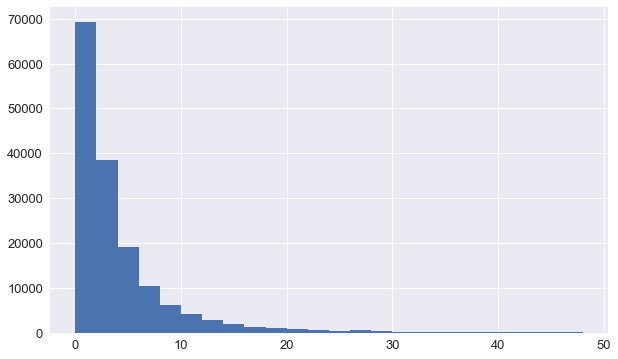

In [28]:
plt.figure(figsize=(10,6))
plt.hist(list(train["num_positive"]),bins = np.arange(0,50,2))

(array([44376., 35861., 22052., 14479.,  9941.,  7163.,  5207.,  3759.,
         2746.,  2179.,  1717.,  1307.,  1198.,   982.,   682.,   703.,
          516.,   491.,   339.,   302.,   272.,   268.,   243.,   314.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48]),
 <a list of 24 Patch objects>)

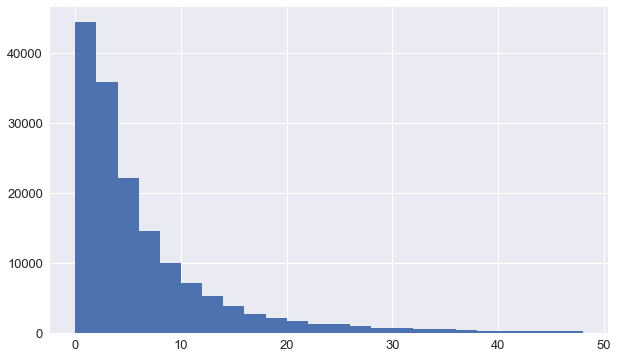

In [29]:
plt.figure(figsize=(10,6))
plt.hist(list(train["num_negtive"]),bins = np.arange(0,50,2))

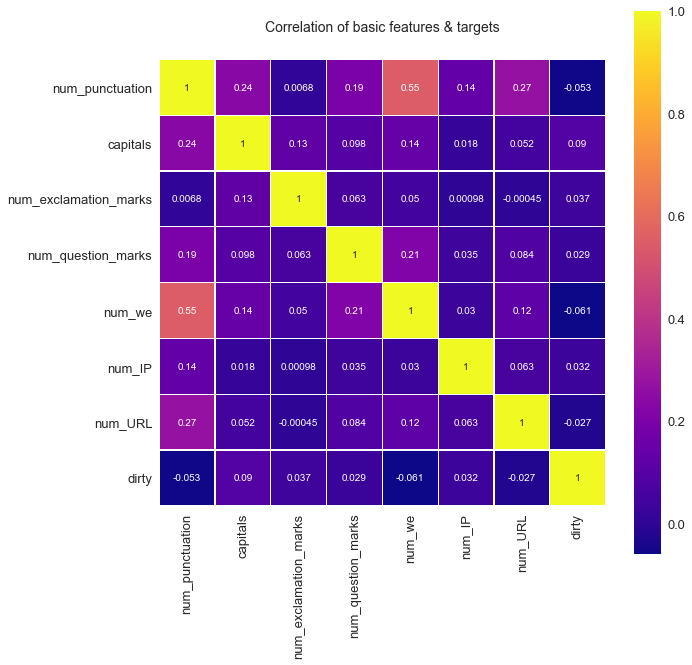

In [84]:
colormap = plt.cm.plasma
plt.figure(figsize=(10,10))
plt.title('Correlation of basic features & targets',y=1.05,size=14)
sns.heatmap(train[['num_punctuation','capitals','num_exclamation_marks','num_question_marks', 'num_we','num_IP', 'num_URL', 'dirty']].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

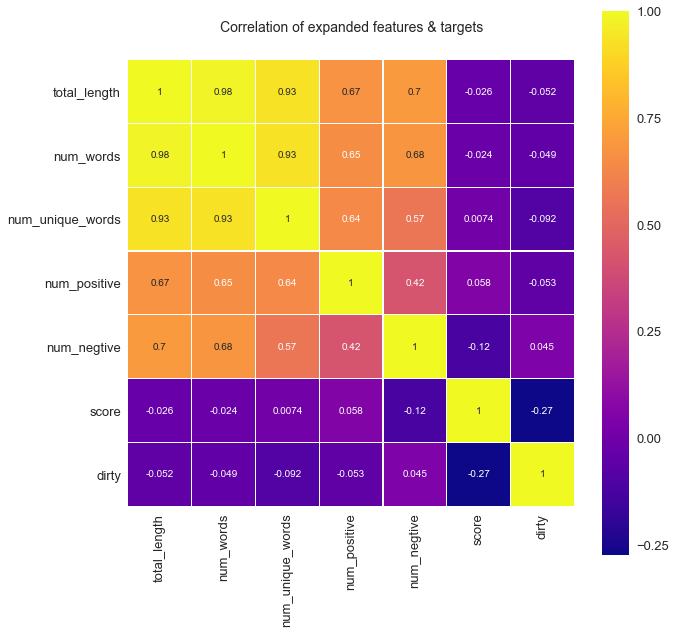

In [86]:
colormap = plt.cm.plasma
plt.figure(figsize=(10,10))
plt.title('Correlation of expanded features & targets',y=1.05,size=14)
sns.heatmap(train[[ 'total_length','num_words', 'num_unique_words','num_positive', 'num_negtive', 'score', 'dirty']].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

### prediction

In [37]:
y = train['dirty']
x = train[['total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_we', 'num_words', 'num_unique_words',
       'words_vs_unique', 'num_smilies', 'num_IP', 'num_URL',
       'num_positive', 'num_negtive', 'score']]

In [38]:
#train, test 7/3
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, 
                                                  test_size=0.3, shuffle=True)

In [39]:
ytrain.sum()/len(ytrain)

0.1016839900088631

In [26]:
#logistic regression
model = LogisticRegression(penalty='l2')
model.fit(xtrain,ytrain)

prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.9034637731761251
Training F1 score: 0.13493782591255515
Testing Accuracy Rate: 0.9033046457219251
Testing F1 score: 0.13330836921924732


In [107]:
#naive bayes
model = BernoulliNB()
model.fit(xtrain,ytrain)

prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.8865970151926159
Training F1 score: 0.2391735239353715
Testing Accuracy Rate: 0.8857996323529411
Testing F1 score: 0.24290264506301068


In [34]:
#tree
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=5, min_samples_leaf=3)
model.fit(xtrain,ytrain)

prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.9588716103098506
Training F1 score: 0.7825222495739442
Testing Accuracy Rate: 0.8764622326203209
Testing F1 score: 0.3584291603384683


In [40]:
#bagging of decision tree -- entropy
base = tree.DecisionTreeClassifier(criterion='entropy')
model = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=1, n_jobs=5)
model.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=5, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [41]:
prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.999051021047637
Training F1 score: 0.9953188482600248
Testing Accuracy Rate: 0.914480280748663
Testing F1 score: 0.4149757073449557


In [62]:
#bagging of decision tree -- gini
base = tree.DecisionTreeClassifier(criterion='gini')
model = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=1, n_jobs=5)
model.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=5, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [63]:
prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.999059973679263
Training F1 score: 0.995361985953443
Testing Accuracy Rate: 0.9145429478609626
Testing F1 score: 0.4173194701609457


In [25]:
#adaboost of decision tree
base = tree.DecisionTreeClassifier(criterion='gini')
model = AdaBoostClassifier(base_estimator=base, n_estimators=100)
model.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [26]:
prd_test = model.predict(xtest)
#prd_test_label = prd_test.astype(int)
    
prd_train = model.predict(xtrain)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest,prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.9991047368373933
Training F1 score: 0.995600915009678
Testing Accuracy Rate: 0.9095504679144385
Testing F1 score: 0.37751581368602644


In [83]:
#Neural Network

In [54]:
#pre-process for nn, scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
X_train = scaler.transform(xtrain)
X_test = scaler.transform(xtest)

In [102]:
modelNN = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100,100,100), activation = "relu", solver='lbfgs', alpha=0.0001, 
                    #learning_rate = 'constant', learning_rate_init = 0.001, 
                    max_iter=500)

In [103]:
modelNN.fit(X_train, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [104]:
prd_test = modelNN.predict(X_test)
#prd_test_label = prd_test.astype(int)
    
prd_train = modelNN.predict(X_train)
#prd_train_label = prd_train.astype(int)
    
train_accuracy = accuracy_score(ytrain, prd_train)
train_f1 = f1_score(ytrain, prd_train)
test_accuracy = accuracy_score(ytest, prd_test)
test_f1 = f1_score(ytest,prd_test)
    
print('Training Accuracy Rate:', train_accuracy)
print('Training F1 score:', train_f1)
print('Testing Accuracy Rate:', test_accuracy)
print('Testing F1 score:', test_f1)

Training Accuracy Rate: 0.9248784680256762
Training F1 score: 0.5130288433637049
Testing Accuracy Rate: 0.9106575868983957
Testing F1 score: 0.41515110077943396


In [66]:
train_f1 = f1_score(ytrain, prd_train)